# Binary Classification Churn

### Permasalahan

> Churn adalah salah satu peristiwa atau perilaku pelanggan beralih dari produk setelah (dalam jangka waktu tertentu) berlangganan produk. Produk dapat berupa barang atau jasa, seperti jaringan internet, penyedia telekomunikasi, dan sejenisnya. Dalam hal ini produk yang dianalisa adalah perusahaan telekomunikasi. Skema churn dapat dijelaskan dalam beberapa tahap. Tahap pertama, tahap ketika pelanggan berlangganan produk. Tahap kedua, yaitu rutinitas, atau perilaku pelanggan atau umpan balik pelanggan terhadap produk yang digunakan selama periode tertentu. Setelah itu, pada tahap ketiga, ada dua jenis, retensi (berlangganan kembali) atau churn (beralih atau berhenti berlangganan). Setiap perusahaan pasti ingin meminimalkan churn dan memaksimalkan retensi. Salah satu solusi yang dapat digunakan adalah dengan menggunakan prediksi churn pelanggan. Dengan ini, perusahaan dapat mengetahui karakteristik yang cenderung beralih atau berhenti berlangganan.

### Data Description

1.   Gender: (Male, Female)
2.   Partner: Marriage status (yes, no)
3.   Tenure: Length of subscription (integer; bulan)
4.   PhoneService: Is using telephone (yes, no)
5.   PaperlessBilling:  Is using paperless billing (yes, no)
6.   MonthlyCharges: (numeric; usd)
7.   Churn: (yes, no)

> In this case we will do churn prediction as response variable



## 1. Import Libraries and Data

IMPORT PACKAGES

In [1]:
# Import Package
import os
import pandas as pd
import numpy as np

# Package untuk visualisasi
import matplotlib.pyplot as plt
import seaborn as sns

# Package untuk cleaning, modelling, dan evaluation model
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score, KFold, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

IMPORT DATA

In [2]:
df_telco = pd.read_csv("TelcoChurn.csv", encoding='utf-8')
df_telco.head()

,gender,Partner,tenure,PhoneService,PaperlessBilling,MonthlyCharges,Churn
0,Female,Yes,1,No,Yes,29.85,No
1,Male,No,34,Yes,No,56.95,No
2,Male,No,2,Yes,Yes,53.85,Yes
3,Male,No,45,No,No,42.30,No
4,Female,No,2,Yes,Yes,70.70,Yes


It can be given that <br>
x = gender, Partner, Tenure, PhoneService, PaperlessBilling, MonthlyCharges <br>
y = Churn

## 2. Exploratory Data Analysis (EDA)

In [3]:
# checking info from data
df_telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   Partner           7043 non-null   object 
 2   tenure            7043 non-null   int64  
 3   PhoneService      7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   MonthlyCharges    7043 non-null   float64
 6   Churn             7043 non-null   object 
dtypes: float64(1), int64(1), object(5)
memory usage: 385.3+ KB


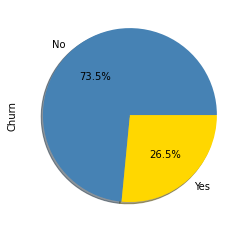

In [4]:
# We're gonna check the ratio of churn
df_telco['Churn'].value_counts().plot.pie(autopct='%1.1f%%',shadow=True, colors = ['steelblue', 'gold'])
plt.show()

In [5]:
# Descriptive analysis
df_telco.describe()

,tenure,MonthlyCharges
count,7043.000000,7043.000000
mean,32.371149,64.761692
std,24.559481,30.090047
min,0.000000,18.250000
25%,9.000000,35.500000
50%,29.000000,70.350000
75%,55.000000,89.850000
max,72.000000,118.750000


<AxesSubplot:xlabel='Partner', ylabel='Monthly Charges'>

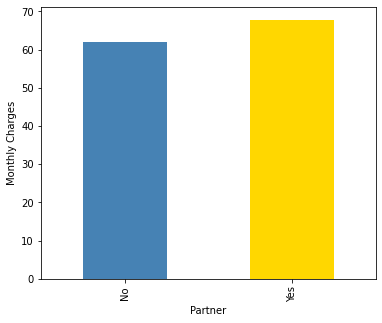

In [6]:
dfg = df_telco.groupby(['Partner'])['MonthlyCharges'].mean()

dfg.plot(kind='bar', ylabel='Monthly Charges',
         xlabel='Partner', figsize=(6, 5), color=['steelblue', 'gold'])

The visualization tells that there's not really much of a difference in monthly charges between customers with partner and without one.
<br>
<br>
Next we'll see if one's gender corresponds to monthly charges of the customers

<AxesSubplot:xlabel='Gender', ylabel='Monthly Charges'>

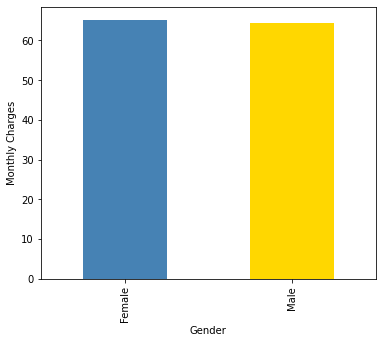

In [7]:
dfg_gender = df_telco.groupby(['gender'])['MonthlyCharges'].mean()

dfg_gender.plot(kind='bar', ylabel='Monthly Charges',
         xlabel='Gender', figsize=(6, 5), color=['steelblue', 'gold'])

Next we'll see if the usage of phone service have effects on monthly charges

<AxesSubplot:xlabel='Phone Service', ylabel='Monthly Charges'>

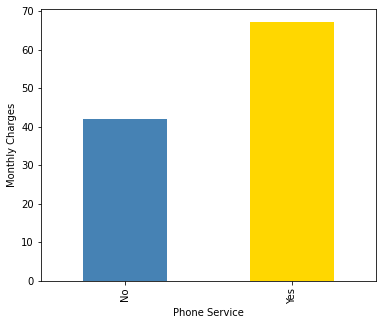

In [8]:
dfg_gender = df_telco.groupby(['PhoneService'])['MonthlyCharges'].mean()

dfg_gender.plot(kind='bar', ylabel='Monthly Charges',
         xlabel='Phone Service', figsize=(6, 5), color=['steelblue', 'gold'])

Accordingly, customers with phone service have higher monthly charges than who don't

<AxesSubplot:xlabel='PhoneService', ylabel='MonthlyCharges'>

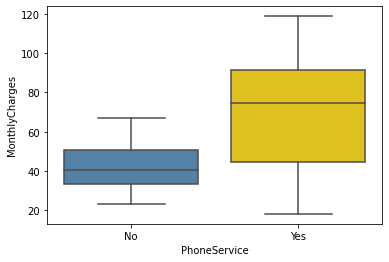

In [9]:
sns.boxplot(x="PhoneService", y="MonthlyCharges", data=df_telco, palette={"Yes": "gold", "No": "steelblue"})

## 3 Preprocessing

### 3.1. Missing value

In [10]:
# cek missing value
df_telco.isnull().sum()

gender              0
Partner             0
tenure              0
PhoneService        0
PaperlessBilling    0
MonthlyCharges      0
Churn               0
dtype: int64

That's great, isn't it, we don't have any nulls

### 3.2. Label Encoder

In [12]:
category = ['gender','Partner','PhoneService','PaperlessBilling','Churn']
df_cat = df_telco[category]
df_cat.head()

,gender,Partner,PhoneService,PaperlessBilling,Churn
0,Female,Yes,No,Yes,No
1,Male,No,Yes,No,No
2,Male,No,Yes,Yes,Yes
3,Male,No,No,No,No
4,Female,No,Yes,Yes,Yes


In [13]:
# Converting to numerical
encoded_data = LabelEncoder()

for feature in category:
        if feature in df_telco.columns.values:
            df_telco[feature] = encoded_data.fit_transform(df_telco[feature])

df_telco.head()

,gender,Partner,tenure,PhoneService,PaperlessBilling,MonthlyCharges,Churn
0,0,1,1,0,1,29.85,0
1,1,0,34,1,0,56.95,0
2,1,0,2,1,1,53.85,1
3,1,0,45,0,0,42.30,0
4,0,0,2,1,1,70.70,1


### 3.3. Checking Correlations

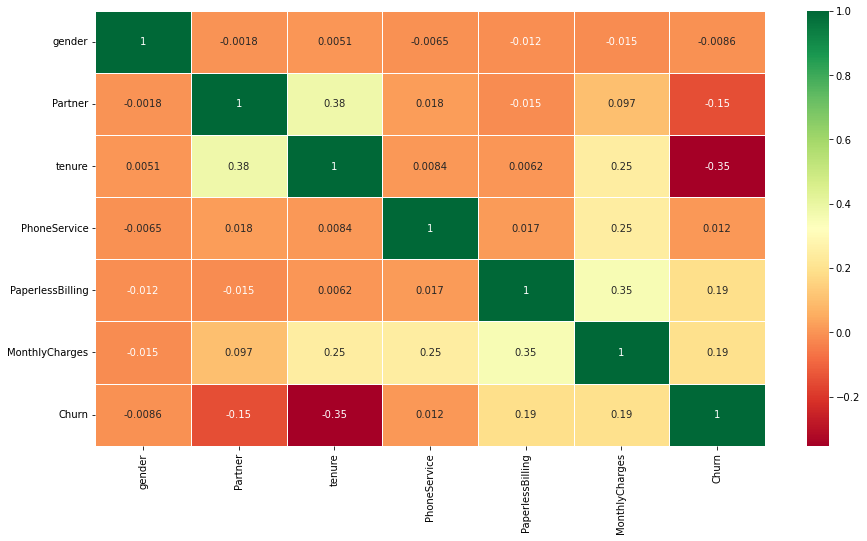

In [14]:
# Melakukan perhitungan nilai korelasi dengan mengasumsikan data adalah data interval.
sns.heatmap(df_telco.corr(),linewidths=.5,annot=True,cmap='RdYlGn')
fig=plt.gcf()
fig.set_size_inches(15,8)
plt.show()

In [16]:
# Cek Urutan korelasi terendah ke tertinggi
corr = df_telco.corr()["Churn"].sort_values()
corr

tenure             -0.352229
Partner            -0.150448
gender             -0.008612
PhoneService        0.011942
PaperlessBilling    0.191825
MonthlyCharges      0.193356
Churn               1.000000
Name: Churn, dtype: float64

## 5. Membangun Model Klasifikasi

MEMBAGI TRAIN TEST DATA

In [17]:
X = df_telco.drop('Churn', axis=1)
y = df_telco['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("X Train : ", len(X_train))
print("y Train : ", len(y_train))
print("X Test : ", len(X_test))
print("y Test : ", len(y_test))

X Train :  4930
y Train :  4930
X Test :  2113
t Test :  2113


Menggunakan data testing berjumlah 30persen dari total data, dan data training berjumlah 70persen dari total data.

### Stats Model (Logistic Regression)

In [18]:
Input = sm.add_constant(X_train)

In [19]:
model = sm.Logit(y_train, X_train, missing='drop')
result = model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.457227
         Iterations 7
                          Results: Logit
Model:              Logit            Pseudo R-squared: 0.206      
Dependent Variable: Churn            AIC:              4520.2572  
Date:               2022-10-08 11:31 BIC:              4559.2757  
No. Observations:   4930             Log-Likelihood:   -2254.1    
Df Model:           5                LL-Null:          -2838.9    
Df Residuals:       4924             LLR p-value:      1.1780e-250
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     7.0000                                        
------------------------------------------------------------------
                   Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
------------------------------------------------------------------
gender            -0.2272   0.0704  -3.2269 0.0013 -0.3652 -0.0892
Partner           -0.1888   0.0785  -2.4052 0.0162 -0

In [20]:
# odds ratio
round(np.exp(result.params), 3)

gender              0.797
Partner             0.828
tenure              0.946
PhoneService        0.205
PaperlessBilling    1.435
MonthlyCharges      1.029
dtype: float64

Prediksi Model

In [21]:
prediction = result.predict(X_test)

In [22]:
pred_results = pd.DataFrame(prediction, columns = ["logreg_pred"])
pred_results["prediksi"] = pred_results['logreg_pred'].apply(lambda x: 1 if x > 0.5 else 0)
pred_results['actual'] = y_test
pred_results.head()

,logreg_pred,prediksi,actual
185,0.694126,1,1
2715,0.047231,0,0
3825,0.016265,0,0
1807,0.627099,1,1
132,0.016522,0,0


### Evaluation Model

In [23]:
print('Test accuracy =  {:.3f}'.format(accuracy_score(pred_results['actual'], pred_results["prediksi"])))
print('Test precision =  {:.3f}'.format(precision_score(pred_results['actual'], pred_results["prediksi"], average='binary')))
print('Test recall =  {:.3f}'.format(recall_score(pred_results['actual'], pred_results["prediksi"], average='binary')))
print('Test f-score =  {:.3f}'.format(f1_score(pred_results['actual'], pred_results["prediksi"], average='binary')))

Test accuracy =  0.787
Test precision =  0.626
Test recall =  0.531
Test f-score =  0.575


### SKLEARN (Logistic Regression)

In [25]:
LR = LogisticRegression()
LR.fit(X_train, y_train)

LogisticRegression()

In [26]:
y_pred = LR.predict(X_test)
logreg_test = pd.merge(X_test, y_test, left_index=True, right_index=True, how='outer')
logreg_test['prediction'] = y_pred
logreg_test.head()

,gender,Partner,tenure,PhoneService,PaperlessBilling,MonthlyCharges,Churn,prediction
185,0,1,1,0,1,24.80,1,0
2715,1,0,41,1,1,25.25,0,0
3825,0,1,52,1,0,19.35,0,0
1807,0,0,1,1,0,76.35,1,1
132,1,0,67,1,0,50.55,0,0


In [27]:
print('Accuracy of logistic regression classifier train data: {:.3f}'.format(LR.score(X_train, y_train)))
print('Accuracy of logistic regression classifier test data: {:.3f}'.format(LR.score(X_test, y_test)))

Accuracy of logistic regression classifier train data: 0.788
Accuracy of logistic regression classifier test data: 0.790


### Evaluation Model

Menerapkan cross validation pada model

In [28]:
# Memilih k-fold (dipilih k = 5)
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

In [29]:
logreg = LogisticRegression(solver='lbfgs', max_iter=1000)
scores = cross_val_score(logreg, X_train, y_train, cv=kfold)
print("Cross-validation scores: {:.3f}".format(scores.mean()))

Cross-validation scores: 0.786


In [30]:
param_grid_lr = { 'C': [0.001, 0.01, 0.1, 1, 10, 100],
                 'class_weight':['balanced', None]}

grid_search_lr = GridSearchCV(logreg, param_grid_lr, cv=kfold)
grid_search_lr.fit(X_train, y_train)
print("Best parameters: {}".format(grid_search_lr.best_params_))
print("Best cross-validation score: {:.3}".format(grid_search_lr.best_score_))

Best parameters: {'C': 0.01, 'class_weight': None}
Best cross-validation score: 0.787


In [31]:
scoring = {'acc': 'accuracy',
           'F1': 'f1',
           'prec': 'precision',
           'recall':'recall'}
 
acc = []
f1 = []
prec = []
recall = []
 
logreg = LogisticRegression(C = 10)
scores = cross_validate(logreg, X, y, cv=kfold, scoring=scoring)
 
acc.append(scores['test_acc'].mean())
f1.append(scores['test_F1'].mean())
prec.append(scores['test_prec'].mean())
recall.append(scores['test_recall'].mean())
 
 
print("Accuracy scores: ", acc)
print("f1 scores: ", f1)
print("Precision scores: ", prec)
print("Recall scores: ", recall)

Accuracy scores:  [0.7877314665462288]
f1 scores:  [0.5373495361155265]
Precision scores:  [0.6364348930292553]
Recall scores:  [0.46521464817865327]


In [32]:
# Terapkan pada data test
logreg.fit(X_train, y_train)
predictions = logreg.predict(X_test)
 
print("Accuracy score: ", accuracy_score(predictions, y_test))
print("Recall score: ", recall_score(predictions, y_test))

Accuracy score:  0.7903454803596782
Recall score:  0.6601466992665037


Comment:...